In [1]:
import math
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
from scipy.integrate import quad, trapz

import scipy.stats
import scipy.optimize
from scipy.signal import find_peaks

%pylab inline

from lmfit import minimize, Parameters, Model

Populating the interactive namespace from numpy and matplotlib


In [2]:
print(sc.__version__)

1.1.0


(0, 6)

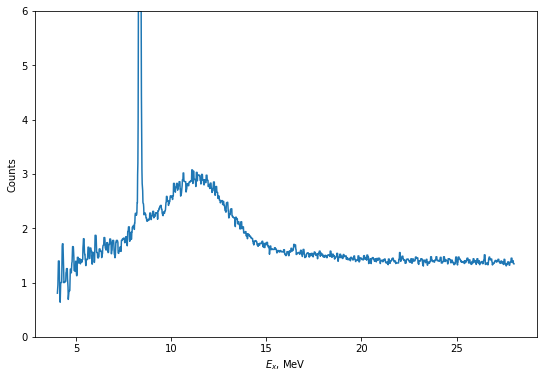

In [3]:
red_4_28 = pd.read_csv('../B(GT) peaks processing/recognition/red data/4_28_red.csv', 
                      sep='\t', decimal=',')

plt.figure(figsize=(9,6))
plt.plot(red_4_28['x'].values, red_4_28['y'].values)
plt.xlabel('$E_x$, MeV')
plt.ylabel('Counts')
plt.ylim(0,6)

Text(0,0.5,'Counts')

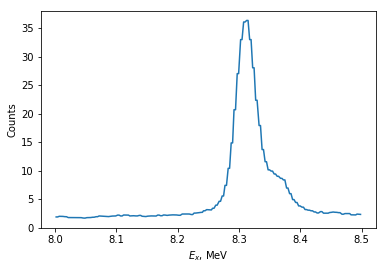

In [4]:
IAS_red = pd.read_csv('../B(GT) peaks processing/recognition/red data/IAS_red.csv', 
                      sep='\t', decimal=',')
plt.plot(IAS_red['x'].values, IAS_red['y'].values)
plt.xlabel('$E_x$, MeV')
plt.ylabel('Counts')

Text(0,0.5,'Counts')

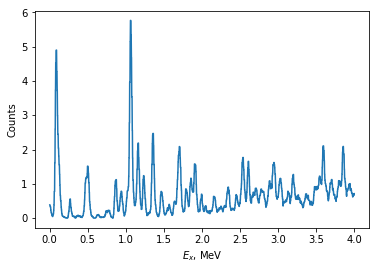

In [5]:
red_0_4 = pd.read_csv('../B(GT) peaks processing/recognition/red data/0_4_red.csv', 
                      sep='\t', decimal=',')
plt.plot(red_0_4['x'].values, red_0_4['y'].values)
plt.xlabel('$E_x$, MeV')
plt.ylabel('Counts')

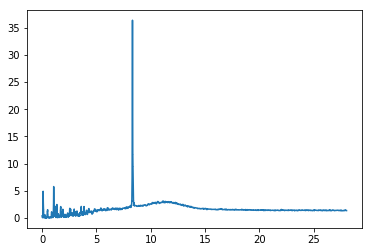

In [6]:
beginning = red_4_28[((red_4_28['x']<8.1))]
middle = IAS_red[((IAS_red['x']>8.1) & (IAS_red['x']<8.65))]
ending = red_4_28[((red_4_28['x']>8.65))]

data = red_0_4.append(beginning).append(middle).append(ending)

plt.plot(data['x'].values, data['y'].values)

(0, 16)

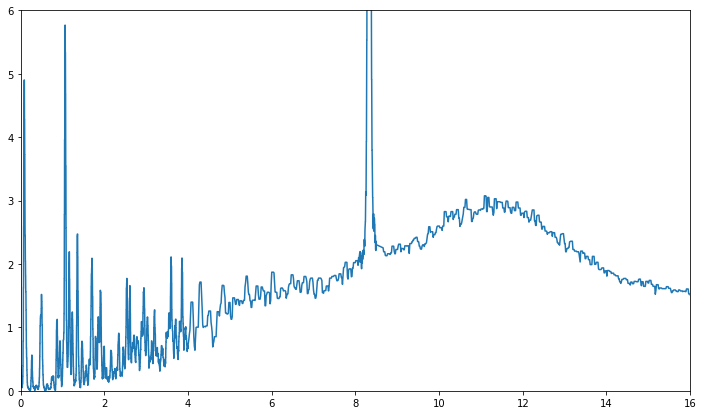

In [7]:
plt.figure(figsize=(12,7))
plt.plot(data['x'].values, data['y'].values)
plt.ylim(0,6)
plt.xlim(0,16)

In [8]:
def gauss(x, mu, sigma, k):
    return k*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.)))

def line(x, a, b):
    return a*x+b

def breit_vigner2(x, M, w = 11.3, alpha = 0.018):
    G = alpha * (w ** 2) + 1
    #G = alpha * (w ** 2)
    y = M * (G**1) * (1-np.exp(-(x/G)**2) ) / ((x - w)**2 + (G**2)/1)
    return np.round(y, decimals=5) #округляем чтобы убрать неустойчивость расчета изза хвостов

def breit_vigner3(x, M, w,  G1):
    G = G1
    y = M * (G**1) * (1-np.exp(-(x/G)**2) ) / ((x - w)**2 + (G**2)/1)
    return np.round(y, decimals=5) #округляем чтобы убрать неустойчивость расчета изза хвостов

In [9]:
#GTR gauss params
mu = 11.3338743
sigma = 2.3
k = 2.90655398

#IAS params from fit
fitted_params3 = [8.31025152e+00,8.33450485e+00,-1.41850172e-02,-3.95164614e-02,
                  2.73399015e+01,8.54260856e+00,2.09512335e+00]

x = np.arange(0, 28, 0.01)
y_gauss_GTR = gauss(data['x'].values, mu, sigma, k)
y_bv2 = breit_vigner2(data['x'].values, 9.8)
y_IAS_1 = gauss(data['x'].values, fitted_params3[0], fitted_params3[2], fitted_params3[4],)
y_IAS_2 = gauss(data['x'].values, fitted_params3[1], fitted_params3[3], fitted_params3[5],)

#y_real = np.interp(xx, xp=data2['x'].values, fp=data2['y'].values
#y_bv2 = breit_vigner2(x_bv, 6.8)

(0, 16)

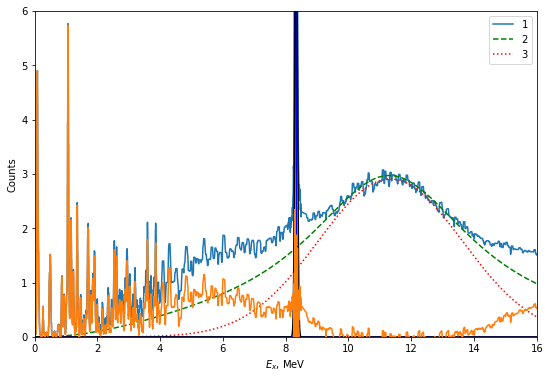

In [10]:
plt.figure(figsize=(9,6))
plt.plot(data['x'].values, data['y'].values, label = '1')
#plt.plot(x_norm, y_bv3, ls='-.', label = '2')
plt.plot(data['x'].values, y_bv2, c='g', ls='--', label = '2')
plt.plot(data['x'].values, y_gauss_GTR, c='r', ls=':', label = '3')
plt.plot(data['x'].values, y_IAS_1, c='b')
plt.plot(data['x'].values, y_IAS_2, c='black')
#plt.plot(data['x'].values, data['y'].values - (y_IAS_2+y_IAS_1+y_gauss_GTR))
plt.plot(data['x'].values, data['y'].values - (y_IAS_2+y_IAS_1+y_bv2))
plt.xlabel('$E_x$, MeV')
plt.ylabel('Counts')
plt.legend()
plt.ylim(0,6)
plt.xlim(0,16)

## IAS

Text(0,0.5,'Counts')

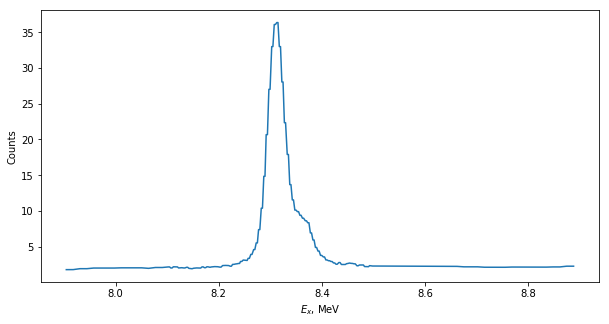

In [11]:
IAS = data[((data['x']>7.9) & (data['x']<8.9))]
plt.figure(figsize=(10,5))
plt.plot(IAS['x'].values, IAS['y'].values)
plt.xlabel('$E_x$, MeV')
plt.ylabel('Counts')

[[Model]]
    ((Model(gauss, prefix='main_') + Model(gauss, prefix='add_')) + Model(line))
[[Fit Statistics]]
    # function evals   = 547
    # data points      = 186
    # variables        = 6
    chi-square         = 183.320
    reduced chi-square = 1.018
    Akaike info crit   = 9.301
    Bayesian info crit = 28.655
[[Variables]]
    main_mu:      8.308 (fixed)
    main_sigma:   0.01618060 (init= 1)
    main_k:       32.0998234 (init= 1)
    add_mu:       8.36 (fixed)
    add_sigma:    0.02786081 (init= 0.1)
    add_k:        7.27437919 (init= 1)
    a:            0.20704684 (init= 0)
    b:            0.43272482 (init= 0)



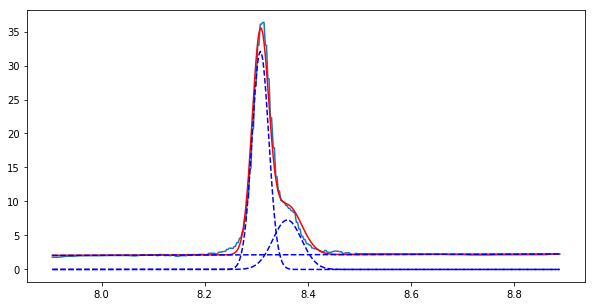

In [12]:
IAS_mod = Model(gauss, prefix='main_') + Model(gauss, prefix='add_') + Model(line)

IAS_mod.set_param_hint('main_mu', value=8.308, vary=False)
IAS_mod.set_param_hint('main_sigma', value=1)
IAS_mod.set_param_hint('main_k', value=1)
IAS_mod.set_param_hint('add_mu', value=8.36, vary=False)
IAS_mod.set_param_hint('add_sigma', value=0.1)
IAS_mod.set_param_hint('add_k', value=1)
IAS_mod.set_param_hint('a', value=0)
IAS_mod.set_param_hint('b', value=0)
pars = IAS_mod.make_params()

IAS_result = IAS_mod.fit(IAS['y'].values, pars, x=IAS['x'].values, method='lbfgs')

print(IAS_result.fit_report())

comps = IAS_result.eval_components()

plt.figure(figsize=(10,5))
plt.plot(IAS['x'].values, IAS['y'].values)
plt.plot(IAS['x'].values, IAS_result.best_fit, 'r-')
plt.plot(IAS['x'].values, comps['main_'], 'b--')
plt.plot(IAS['x'].values, comps['add_'], 'b--')
plt.plot(IAS['x'].values, comps['line'], 'b--')

[[Model]]
    ((Model(breit_vigner3, prefix='main_') + Model(breit_vigner3, prefix='add_')) + Model(line))
[[Fit Statistics]]
    # function evals   = 4171
    # data points      = 186
    # variables        = 6
    chi-square         = 376.376
    reduced chi-square = 2.091
    Akaike info crit   = 143.100
    Bayesian info crit = 162.455
[[Variables]]
    main_M:    0.58439539 (init= 0.5)
    main_w:    8.308 (fixed)
    main_G1:   0.01667958 (init= 0.01)
    add_M:     0.17497466 (init= 0.5)
    add_w:     8.36 (fixed)
    add_G1:    0.03175952 (init= 0.05)
    a:         0.14917494 (init= 0)
    b:         0.01578845 (init= 0)



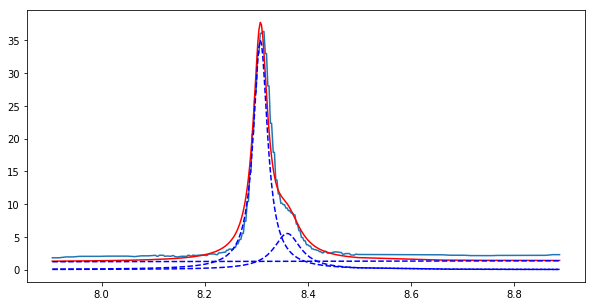

In [13]:
IAS_mod = Model(breit_vigner3, prefix='main_') + Model(breit_vigner3, prefix='add_') + Model(line)

IAS_mod.set_param_hint('main_w', value=8.308, vary=False)
IAS_mod.set_param_hint('main_G1', value=0.01, min=0, max=0.5)
IAS_mod.set_param_hint('main_M', value=0.5, min=0.1, max= 1)
IAS_mod.set_param_hint('add_w', value=8.36, vary=False)
IAS_mod.set_param_hint('add_G1', value=0.05, min=0, max=0.5)
IAS_mod.set_param_hint('add_M', value=0.5, min=0.1, max=0.7)
IAS_mod.set_param_hint('a', value=0, min=0, max=0.5)
IAS_mod.set_param_hint('b', value=0, min=0, max=0.5)
pars = IAS_mod.make_params()

IAS_result = IAS_mod.fit(IAS['y'].values, pars, x=IAS['x'].values, method='differential_evolution')

print(IAS_result.fit_report())

comps = IAS_result.eval_components()

plt.figure(figsize=(10,5))
plt.plot(IAS['x'].values, IAS['y'].values)
plt.plot(IAS['x'].values, IAS_result.best_fit, 'r-')
plt.plot(IAS['x'].values, comps['main_'], 'b--')
plt.plot(IAS['x'].values, comps['add_'], 'b--')
plt.plot(IAS['x'].values, comps['line'], 'b--')

[[Model]]
    ((Model(breit_vigner3, prefix='main_') + Model(breit_vigner3, prefix='add_')) + Model(line))
[[Fit Statistics]]
    # function evals   = 589
    # data points      = 186
    # variables        = 6
    chi-square         = 376.444
    reduced chi-square = 2.091
    Akaike info crit   = 143.134
    Bayesian info crit = 162.488
[[Variables]]
    main_M:    0.58381688 (init= 0.5843954)
    main_w:    8.308 (fixed)
    main_G1:   0.01659918 (init= 0.01067958)
    add_M:     0.17503563 (init= 0.1749747)
    add_w:     8.36 (fixed)
    add_G1:    0.03262877 (init= 0.03175952)
    a:         0.14918359 (init= 0.1491749)
    b:         0.01578932 (init= 0.01578845)



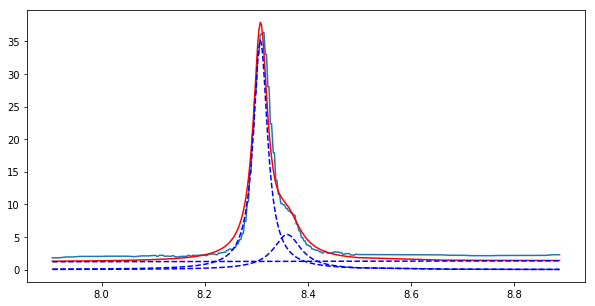

In [16]:
IAS_mod = Model(breit_vigner3, prefix='main_') + Model(breit_vigner3, prefix='add_') + Model(line)

IAS_mod.set_param_hint('main_w', value=8.308, vary=False)
IAS_mod.set_param_hint('main_G1', value=0.01067958)
IAS_mod.set_param_hint('main_M', value=0.58439539)
IAS_mod.set_param_hint('add_w', value=8.36, vary=False)
IAS_mod.set_param_hint('add_G1', value=0.03175952)
IAS_mod.set_param_hint('add_M', value=0.17497466)
IAS_mod.set_param_hint('a', value=0.14917494)
IAS_mod.set_param_hint('b', value=0.01578845)
pars = IAS_mod.make_params()

IAS_result = IAS_mod.fit(IAS['y'].values, pars, x=IAS['x'].values, method='lbfgsb')

print(IAS_result.fit_report())

comps = IAS_result.eval_components()

plt.figure(figsize=(10,5))
plt.plot(IAS['x'].values, IAS['y'].values)
plt.plot(IAS['x'].values, IAS_result.best_fit, 'r-')
plt.plot(IAS['x'].values, comps['main_'], 'b--')
plt.plot(IAS['x'].values, comps['add_'], 'b--')
plt.plot(IAS['x'].values, comps['line'], 'b--')

(0, 16)

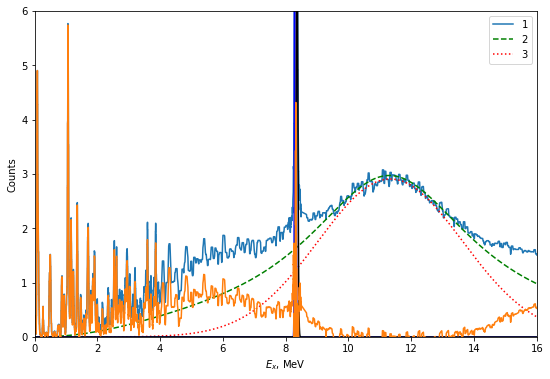

In [13]:
#GTR gauss params
mu = 11.3338743
sigma = 2.3
k = 2.90655398

x = np.arange(0, 28, 0.01)
y_gauss_GTR = gauss(data['x'].values, mu, sigma, k)
y_bv2 = breit_vigner2(data['x'].values, 9.8)
y_IAS_1 = gauss(data['x'].values, IAS_result.values['main_mu'], 
                IAS_result.values['main_sigma'], IAS_result.values['main_k'],)
y_IAS_2 = gauss(data['x'].values, IAS_result.values['add_mu'], 
                IAS_result.values['add_sigma'], IAS_result.values['add_k'],)
#y_real = np.interp(xx, xp=data2['x'].values, fp=data2['y'].values
#y_bv2 = breit_vigner2(x_bv, 6.8)


plt.figure(figsize=(9,6))
plt.plot(data['x'].values, data['y'].values, label = '1')
#plt.plot(x_norm, y_bv3, ls='-.', label = '2')
plt.plot(data['x'].values, y_bv2, c='g', ls='--', label = '2')
plt.plot(data['x'].values, y_gauss_GTR, c='r', ls=':', label = '3')
plt.plot(data['x'].values, y_IAS_1, c='b')
plt.plot(data['x'].values, y_IAS_2, c='black')
#plt.plot(data['x'].values, data['y'].values - (y_IAS_2+y_IAS_1+y_gauss_GTR))
plt.plot(data['x'].values, data['y'].values - (y_IAS_2+y_IAS_1+y_bv2))
plt.xlabel('$E_x$, MeV')
plt.ylabel('Counts')
plt.legend()
plt.ylim(0,6)
plt.xlim(0,16)

(7.5, 9.5)

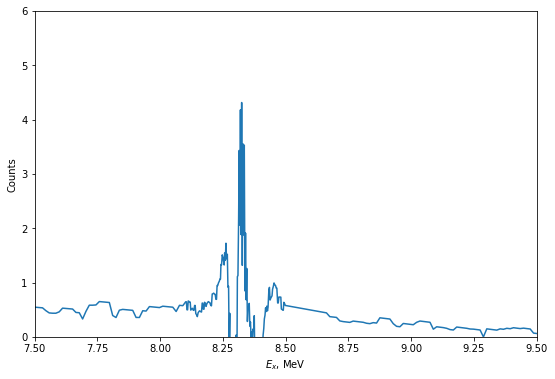

In [14]:
y_no_IAS = data['y'].values - (y_IAS_2+y_IAS_1+y_bv2)

plt.figure(figsize=(9,6))
plt.plot(data['x'].values, y_no_IAS)
plt.xlabel('$E_x$, MeV')
plt.ylabel('Counts')
plt.ylim(0,6)
plt.xlim(7.5,9.5)

(0, 11)

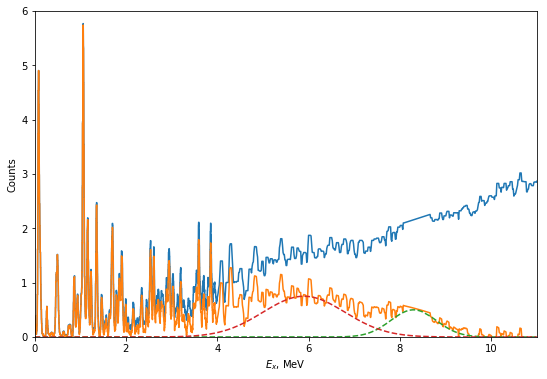

In [15]:
#data3 = beginning.append(ending)
data3 = data[data['x']<8.1].append(data[8.65<data['x']])
data3_y = np.interp(x=data['x'].values, xp=data3['x'], fp=data3['y'])
pygmy1 = gauss(data['x'].values, 8.3, 0.5, 0.5)
pygmy2 = gauss(data['x'].values, 5.9, 0.9, 0.75)

plt.figure(figsize=(9,6))
plt.plot(data['x'].values, data3_y)
plt.plot(data['x'].values, data3_y - y_bv2)
plt.plot(data['x'].values, pygmy1, ls='--')
plt.plot(data['x'].values, pygmy2, ls='--')
#plt.plot(data['x'].values, data3_y - y_bv2- pygmy1)
#plt.plot(data['x'].values, data3_y - y_bv2- pygmy1 - pygmy2)
plt.xlabel('$E_x$, MeV')
plt.ylabel('Counts')
plt.ylim(0,6)
plt.xlim(0,11)

## GTR

Text(0,0.5,'Counts')

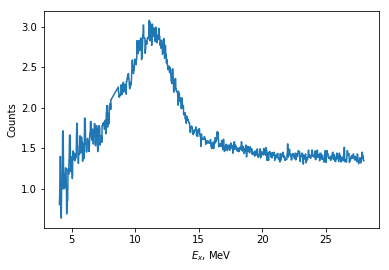

In [16]:
data2 = beginning.append(ending)

plt.plot(data2['x'].values, data2['y'].values)
plt.xlabel('$E_x$, MeV')
plt.ylabel('Counts')

In [17]:
def QFC_back(E, E_qf, N_0, W = 22, T = 100):
    Q_EC_76As=0.9233
    S_p_76As=7.723
    E_t_gs = 420 - Q_EC_76As
    E_0 = E_t_gs - S_p_76As
    x = E_t_gs - E
    return N_0 * ( 1 - np.exp((x-E_0)/T) )/( 1 + ((x-E_qf)/W)**2)

def QFC_back2(x, E_qf, N_0, W, T):
    Q_EC_76As=0.9233
    S_p_76As=7.723
    E_t_gs = 420 - Q_EC_76As
    E_0 = E_t_gs - S_p_76As
    E = E_t_gs - x
    return N_0 * ( 1 - np.exp((E-E_0)/T) )/( 1 + ((E-E_qf)/W)**2)

def QFC_back3(x, E_qf, N_0, W, T):
    Q_EC_76As=0.9233
    S_p_76As=7.723
    E_t_gs = 420 - Q_EC_76As
    E_0 = E_t_gs - S_p_76As
    E = E_t_gs - x
    
    values = N_0 * ( 1 - np.exp((E-E_0)/T) )/( 1 + ((E-E_qf)/W)**2)
    values_more0 = values[ np.where(values>0) ]
    beginning = np.zeros((len(x)-len(values_more0)))
    return np.concatenate((beginning, values_more0))


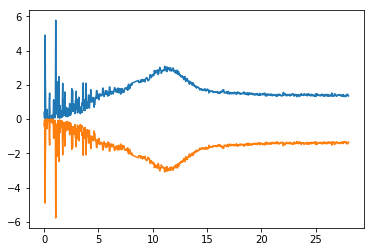

In [18]:
data3 = red_0_4.append(data2)
plt.plot(data3['x'].values, data3['y'].values)
plt.plot(data3['x'].values, -data3['y'].values)

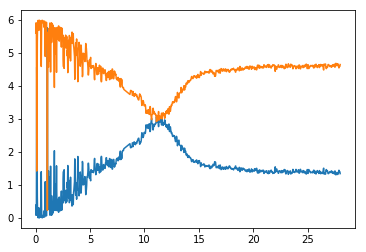

In [19]:
x_data = np.linspace(0,28,1000)
y_data = np.interp(x_data, data3['x'].values, data3['y'].values)
plt.plot(x_data, y_data)
plt.plot(x_data, -y_data+6)

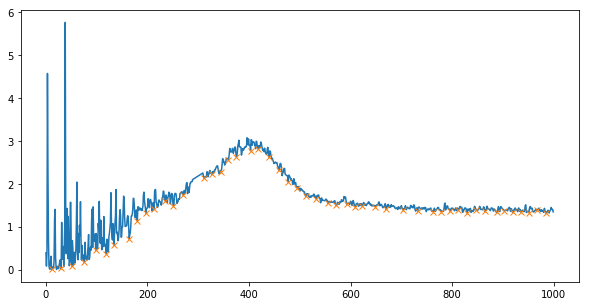

In [20]:
peaks, _ = sc.signal.find_peaks(-y_data+6, distance=15)
plt.figure(figsize=(10,5))
plt.plot(y_data)
plt.plot(peaks, y_data[peaks], "x")

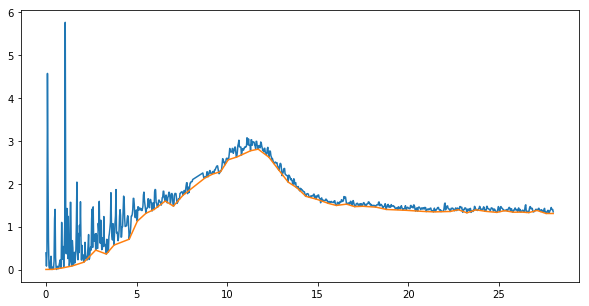

In [21]:
y_data2 = np.interp(x_data, x_data[peaks], y_data[peaks])
plt.figure(figsize=(10,5))
plt.plot(x_data, y_data)
plt.plot(x_data, y_data2)

[[Model]]
    (Model(QFC_back2) + Model(gauss))
[[Fit Statistics]]
    # function evals   = 1107
    # data points      = 1000
    # variables        = 6
    chi-square         = 121.117
    reduced chi-square = 0.122
    Akaike info crit   = -2098.999
    Bayesian info crit = -2069.553
[[Variables]]
    E_qf:    397.981642 (init= 150)
    N_0:     9.99999999 (init= 1)
    W:       10         (init= 22)
    T:       96.5731381 (init= 100)
    mu:      11.3 (fixed)
    sigma:   3          (init= 3)
    k:       2.69165590 (init= 1)



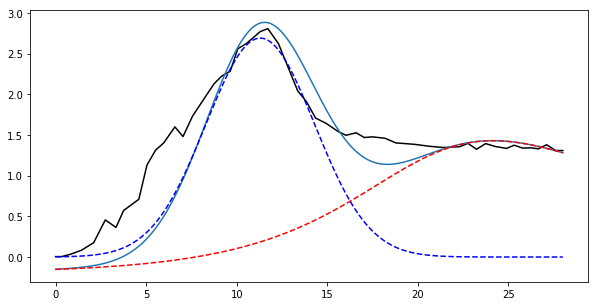

In [22]:
mod = Model(QFC_back2) + Model(gauss)

mod.set_param_hint('E_qf', value=150)
mod.set_param_hint('N_0', value=1, max=10)
mod.set_param_hint('W', value=22, min=10, max= 30)
mod.set_param_hint('T', value=100, min=1, max=300)
mod.set_param_hint('mu', value=11.3,vary=False)
mod.set_param_hint('sigma', value=3, max=3)
mod.set_param_hint('k', value=1)
pars = mod.make_params()

result = mod.fit(y_data2, pars, method='lbfgsb', x=x_data)

print(result.fit_report())

comps = result.eval_components()

#plt.plot(x_data, y_data),5
plt.figure(figsize(10,5))
plt.plot(x_data, y_data2, 'black')
plt.plot(x_data, result.best_fit)
plt.plot(x_data, comps['QFC_back2'], 'r--')
plt.plot(x_data, comps['gauss'], 'b--')

[[Model]]
    (Model(QFC_back2) + Model(breit_vigner3))
[[Fit Statistics]]
    # function evals   = 37
    # data points      = 1000
    # variables        = 3
    chi-square         = 96.402
    reduced chi-square = 0.097
    Akaike info crit   = -2333.232
    Bayesian info crit = -2318.509
[[Variables]]
    E_qf:   393.916891 (init= 400)
    N_0:    7.81562882 (init= 8)
    W:      22 (fixed)
    T:      100 (fixed)
    M:      8.80000000 (init= 8.8)
    w:      11.3 (fixed)
    G1:     3.3 (fixed)



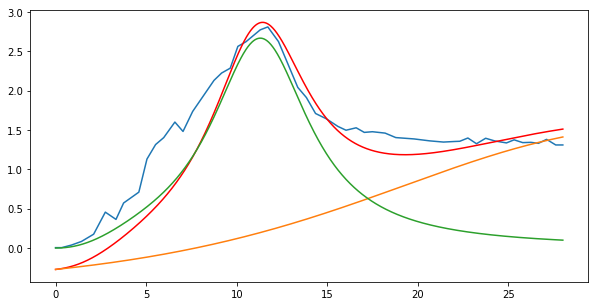

In [23]:
mod = Model(QFC_back2) + Model(breit_vigner3)

mod.set_param_hint('E_qf', value=400, max=420, min=300 )
mod.set_param_hint('N_0', value=8, max=30, min=1 )
mod.set_param_hint('W', value=22, vary=False)
mod.set_param_hint('T', value=100,vary=False)
mod.set_param_hint('M', value=8.8, min=1, max=11 )
mod.set_param_hint('w', value=11.3,vary=False)
mod.set_param_hint('G1', value=3.3,vary=False)

pars = mod.make_params()

result = mod.fit(y_data2, pars, method='lbfgs', x=x_data)

print(result.fit_report())

comps = result.eval_components()

#plt.plot(x_data, y_data)
plt.plot(x_data, y_data2)
plt.plot(x_data, result.best_fit, 'r-')
plt.plot(x_data, comps['QFC_back2'])
plt.plot(x_data, comps['breit_vigner3'])

(0, 6)

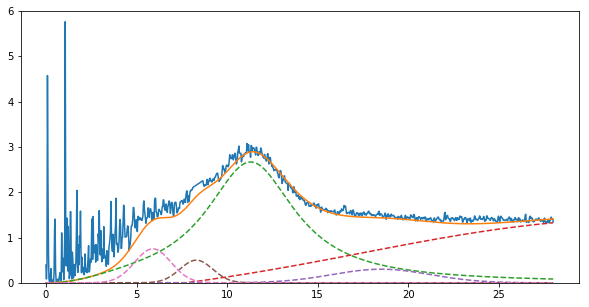

In [24]:
E_qf = 395.91689
N_0 = 7.51562882
G1 = 3.0
M = 8.0
a=np.linspace(0,45,1000)

y_bv3 = breit_vigner3(x_data, M, 11.3, G1)
y_QFC = QFC_back3(x_data, E_qf, N_0, 24, 100)
y_gauss_SDR = gauss(x_data, 18.5, 2.7,0.3)
pygmy1_n = gauss(x_data, 8.3, 0.9, 0.5)
pygmy2_n = gauss(x_data, 5.9, 1, 0.75)

plt.figure(figsize=(10,5))
plt.plot(x_data, y_data)
plt.plot(x_data, y_bv3+y_QFC+y_gauss_SDR+pygmy1_n+pygmy2_n)
#plt.plot(x_data, y_data-(y_bv3+y_QFC+y_gauss_SDR+pygmy1_n+pygmy2_n))
#plt.plot(a, QFC_back2(a, E_qf, N_0, 24, 100))
plt.plot(x_data, y_bv3, ls='--')
plt.plot(x_data, y_QFC, ls='--')
plt.plot(x_data, y_gauss_SDR, ls='--')
plt.plot(x_data, pygmy1_n, ls='--')
plt.plot(x_data, pygmy2_n, ls='--')
plt.ylim(0,6)

(0, 6)

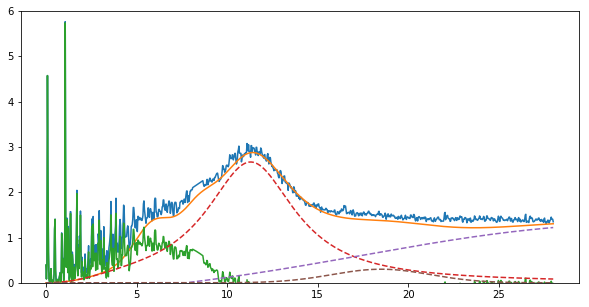

In [38]:
E_qf = 395.91689
N_0 = 6.91562882
G1 = 3.0
M = 8.0
a=np.linspace(0,45,1000)

y_bv3 = breit_vigner3(x_data, M, 11.3, G1)
y_QFC = QFC_back3(x_data, E_qf, N_0, 24, 100)
y_bv_SDR = breit_vigner3(x_data, 3, 18.5, 4)
pygmy1_n = gauss(x_data, 8.3, 0.9, 0.5)
pygmy2_n = gauss(x_data, 5.9, 1, 0.75)

plt.figure(figsize=(10,5))
plt.plot(x_data, y_data)
plt.plot(x_data, y_bv3+y_QFC+y_gauss_SDR+pygmy1_n+pygmy2_n)
plt.plot(x_data, y_data-(y_bv3+y_QFC+y_bv_SDR))
#plt.plot(a, QFC_back2(a, E_qf, N_0, 24, 100))
plt.plot(x_data, y_bv3, ls='--')
plt.plot(x_data, y_QFC, ls='--')
plt.plot(x_data, y_gauss_SDR, ls='--')
#plt.plot(x_data, pygmy1_n, ls='--')
#plt.plot(x_data, pygmy2_n, ls='--')
plt.ylim(0,6)

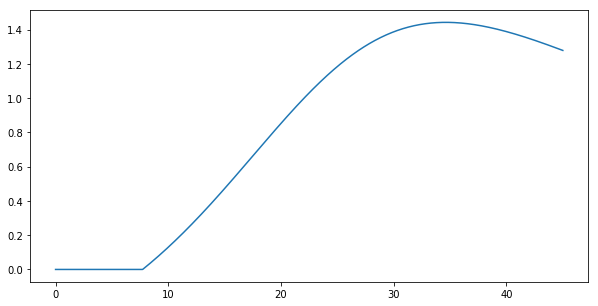

In [25]:
plt.plot(a, QFC_back3(a, E_qf, N_0, 24, 100))

In [26]:
mod = Model(QFC_back2) + Model(breit_vigner3) + Model(gauss)

mod.set_param_hint('E_qf', value=400, max=420, min=300 )
mod.set_param_hint('N_0', value=8, max=1, min=30 )
mod.set_param_hint('W', value=24,max=20, min=30)
mod.set_param_hint('T', value=100,max=70, min=300)
mod.set_param_hint('M', value=6, max=1, min=8.5 )
mod.set_param_hint('w', value=11.3,vary=False)
mod.set_param_hint('G1', value=3.3,vary=False)
pars = mod.make_params()

result = mod.fit(y_data2, pars, method='differential_evolution', x=x_data)

print(result.fit_report())

comps = result.eval_components()

#plt.plot(x_data, y_data)
plt.plot(x_data, y_data2)
plt.plot(x_data, result.best_fit, 'r-')
plt.plot(x_data, comps['QFC_back2'])
plt.plot(x_data, comps['breit_vigner3'])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


ValueError: differential_evolution requires finite bound for all varying parameters

In [27]:
def QFC_1(E):
    E_0 = 191.656
    W = 22
    T = 100
    E_t_gs = 197.3
    x = E_t_gs - E
    E_qf = 200.761 - 23.11
    return 2 * ( 1 - np.exp((x-E_0)/T) )/( 1 + ((x-E_qf)/W)**2)

plt.plot(xx, QFC_1(xx), c='r')

NameError: name 'xx' is not defined